#### Importing Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.svm import SVC

#### Reading the Dataset

In [2]:
data = pd.read_csv('healthcare_dataset.csv')

#### Checking for the first top five rows from the dataset

In [3]:
data.head()

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Bobby JacksOn,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal
1,LesLie TErRy,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,265,Emergency,2019-08-26,Ibuprofen,Inconclusive
2,DaNnY sMitH,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,205,Emergency,2022-10-07,Aspirin,Normal
3,andrEw waTtS,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,450,Elective,2020-12-18,Ibuprofen,Abnormal
4,adrIENNE bEll,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317814,458,Urgent,2022-10-09,Penicillin,Abnormal


#### Checking for the dataset columns

In [4]:
data.columns

Index(['Name', 'Age', 'Gender', 'Blood Type', 'Medical Condition',
       'Date of Admission', 'Doctor', 'Hospital', 'Insurance Provider',
       'Billing Amount', 'Room Number', 'Admission Type', 'Discharge Date',
       'Medication', 'Test Results'],
      dtype='object')

#### Checking the summary of the dataset

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55500 entries, 0 to 55499
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                55500 non-null  object 
 1   Age                 55500 non-null  int64  
 2   Gender              55500 non-null  object 
 3   Blood Type          55500 non-null  object 
 4   Medical Condition   55500 non-null  object 
 5   Date of Admission   55500 non-null  object 
 6   Doctor              55500 non-null  object 
 7   Hospital            55500 non-null  object 
 8   Insurance Provider  55500 non-null  object 
 9   Billing Amount      55500 non-null  float64
 10  Room Number         55500 non-null  int64  
 11  Admission Type      55500 non-null  object 
 12  Discharge Date      55500 non-null  object 
 13  Medication          55500 non-null  object 
 14  Test Results        55500 non-null  object 
dtypes: float64(1), int64(2), object(12)
memory usage: 6.4

#### Removing unnecessary columns from the dataset

In [6]:
data.drop(['Name', 'Doctor', 'Hospital', 'Room Number'], axis=1, inplace=True)

In [7]:
data['Date of Admission'] = pd.to_datetime(data['Date of Admission'], errors='coerce')
data['Discharge Date'] = pd.to_datetime(data['Discharge Date'], errors='coerce')

In [8]:
data['Length of stay'] = (data['Discharge Date'] - data['Date of Admission']).dt.days

In [9]:
data = data[data['Medication'].notna()]

In [10]:
data.fillna(method='ffill', inplace=True)

C:\Users\kalur\AppData\Local\Temp\ipykernel_11396\2866031220.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)


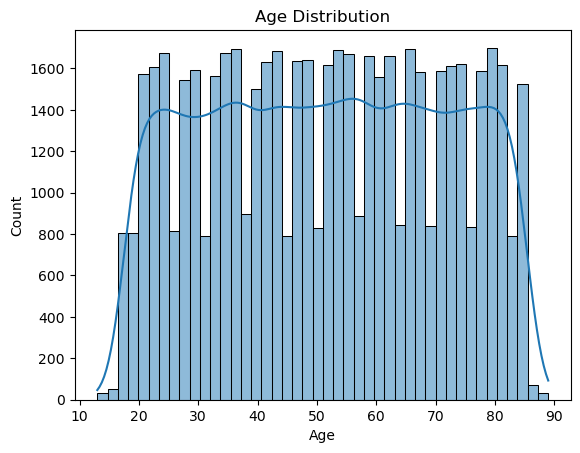

In [11]:
sns.histplot(data['Age'], kde=True)
plt.title("Age Distribution")
plt.show()

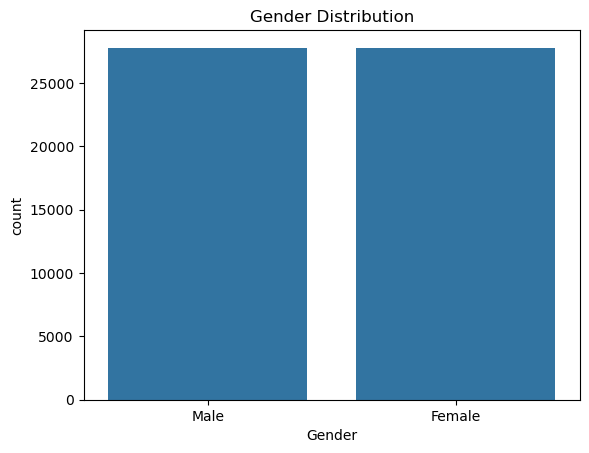

In [12]:
sns.countplot(data=data, x = 'Gender')
plt.title("Gender Distribution")
plt.show()

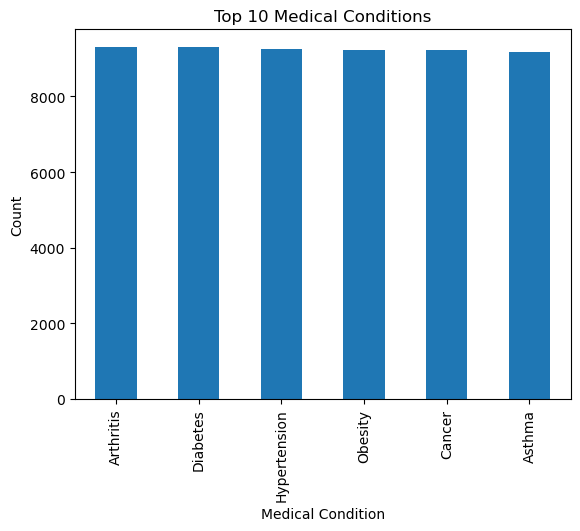

In [13]:
top_conditions = data['Medical Condition'].value_counts().nlargest(10)
top_conditions.plot(kind='bar', title="Top 10 Medical Conditions")
plt.ylabel("Count")
plt.show()

In [14]:
data['Billing Amount'] = data['Billing Amount'].astype(str).str.replace(',', '').str.replace('$', '').astype(float)

In [15]:
data['Test Results'] = data['Test Results'].fillna(data['Test Results'].mode()[0])

In [16]:
categorical_cols = ['Gender', 'Blood Type', 'Medical Condition', 'Insurance Provider', 'Admission Type', 'Test Results']
label_encoders = {}

In [17]:
for col in categorical_cols:
  le = LabelEncoder()
  data[col] = le.fit_transform(data[col])
  label_encoders[col] = le

In [18]:
target_le = LabelEncoder()
data['Medication'] = target_le.fit_transform(data['Medication'])

In [19]:
data.drop(['Date of Admission', 'Discharge Date'], axis=1, inplace=True)

#### Preparing the data for the model

In [20]:
x = data.drop('Medication', axis=1)
y = data['Medication']

In [21]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

#### Random Forest Classifier Model

In [22]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

In [23]:
x_train.dtypes

Age                     int64
Gender                  int32
Blood Type              int32
Medical Condition       int32
Insurance Provider      int32
Billing Amount        float64
Admission Type          int32
Test Results            int32
Length of stay          int64
dtype: object

In [24]:
x_test.dtypes

Age                     int64
Gender                  int32
Blood Type              int32
Medical Condition       int32
Insurance Provider      int32
Billing Amount        float64
Admission Type          int32
Test Results            int32
Length of stay          int64
dtype: object

In [25]:
y_pred = model.predict(x_test)

In [26]:
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.32117117117117117


In [27]:
print(classification_report(y_test, y_pred, target_names=target_le.classes_.astype(str)))

              precision    recall  f1-score   support

     Aspirin       0.32      0.33      0.32      2211
   Ibuprofen       0.32      0.33      0.32      2271
     Lipitor       0.31      0.32      0.32      2224
 Paracetamol       0.33      0.32      0.33      2207
  Penicillin       0.32      0.32      0.32      2187

    accuracy                           0.32     11100
   macro avg       0.32      0.32      0.32     11100
weighted avg       0.32      0.32      0.32     11100



In [69]:
import joblib

joblib.dump(model, 'medication_model.joblib')
joblib.dump(target_le, 'medication_label_encoder.joblib')
for col, le in label_encoders.items():
    joblib.dump(le, f'{col}_encoder.joblib')

In [71]:
data.columns

Index(['Age', 'Gender', 'Blood Type', 'Medical Condition',
       'Insurance Provider', 'Billing Amount', 'Admission Type', 'Medication',
       'Test Results', 'Length of stay'],
      dtype='object')

In [73]:
print(data['Test Results'].head())
print(data['Test Results'].dtype)

0    2
1    1
2    2
3    0
4    0
Name: Test Results, dtype: int32
int32


In [79]:
from sklearn.preprocessing import LabelEncoder

# Fill missing values if needed
data['Test Results'] = data['Test Results'].fillna('Unknown')

# Encode
test_results_encoder = LabelEncoder()
data['Test Results'] = test_results_encoder.fit_transform(data['Test Results'])


In [81]:
data['Test Results'] = data['Test Results'].fillna(data['Test Results'].mean())

In [87]:
x = data.drop("Medication", axis=1)
y = data["Medication"]

# Split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [93]:
from sklearn.preprocessing import LabelEncoder
test_results_encoder = LabelEncoder()
data['Test Results'] = test_results_encoder.fit_transform(data['Test Results'])
joblib.dump(test_results_encoder, "Test Results_encoder.joblib")


['Test Results_encoder.joblib']